## Etape 1 : Initialisation des modules Python

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import sys
print(sys.path)
sys.path.append('1-Projet')
import ep.etools as ept

fit_verbosity = 1


['/Users/rky/Documents/GitHub/Machine-Learning/5-Fidle - CNN/CNN', '/Users/rky/.vscode-insiders/extensions/ms-toolsai.jupyter-2022.6.1001562429/pythonFiles', '/Users/rky/.vscode-insiders/extensions/ms-toolsai.jupyter-2022.6.1001562429/pythonFiles/lib/python', '/Users/rky/miniforge3/envs/tf-env/lib/python310.zip', '/Users/rky/miniforge3/envs/tf-env/lib/python3.10', '/Users/rky/miniforge3/envs/tf-env/lib/python3.10/lib-dynload', '', '/Users/rky/miniforge3/envs/tf-env/lib/python3.10/site-packages']


## Etape 2 : Récupération des données

depuis Keras on charge les train_set et test_set de la dataset MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Etape 3 : Préparation des données

* on calcul moyenne et écart-type
* on normalise pour obtenir un dataset de moyenne zéro et d'écart-type 0.

dans le cas présent on divise simplement par le maxi qui doite être 255 !

In [3]:
xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('Aprés normalisation  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Aprés normalisation  : Min=0.0, max=1.0


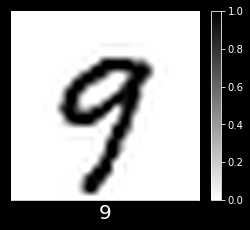

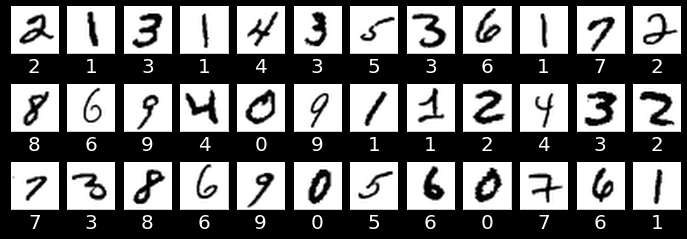

In [4]:
ept.plot_images(x_train,y_train , [45],  x_size=5,y_size=5, colorbar=True) #, save_as='01-one-digit')
# plt.imshow(x_train[0], cmap='Blues')
ept.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')


## Etape 4 - Création du model
Les informations se trouvent ci-aprés : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1 = 16
hidden2 = 16

model = keras.Sequential([
    keras.layers.Input((28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(hidden1, activation='relu'),
    keras.layers.Dense(hidden2, activation='relu'),
    keras.layers.Dense(10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Etape 5 : Entrainement du Model

In [6]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose= fit_verbosity,
                    validation_data=(x_test, y_test))

Epoch 1/16
  1/118 [..............................] - ETA: 15s - loss: 2.3452 - accuracy: 0.1465

2022-06-18 15:57:30.022506: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


118/118 [==============================] - 0s 2ms/step - loss: 1.2936 - accuracy: 0.5984 - val_loss: 0.5356 - val_accuracy: 0.8590
Epoch 2/16
118/118 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8822 - val_loss: 0.3340 - val_accuracy: 0.9027
Epoch 3/16
118/118 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.9092 - val_loss: 0.2848 - val_accuracy: 0.9158
Epoch 4/16
118/118 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.9200 - val_loss: 0.2561 - val_accuracy: 0.9249
Epoch 5/16
118/118 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.9266 - val_loss: 0.2409 - val_accuracy: 0.9281
Epoch 6/16
118/118 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9318 - val_loss: 0.2287 - val_accuracy: 0.9321
Epoch 7/16
118/118 [==============================] - 0s 1ms/step - loss: 0.2236 - accuracy: 0.9353 - val_loss: 0.2212 - val_accuracy: 0.9329
Epoch 8/16
118/11

## Etape 6 : On évalue le Model

### 6.1/ Résultat final Loss & Accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.18249540030956268
Test accuracy : 0.9456999897956848


### 6.2/ Vitesse d'apprentissage

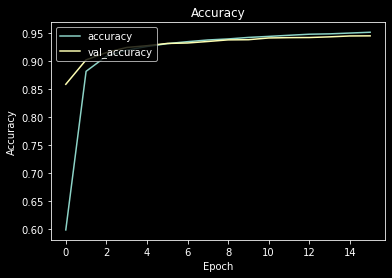

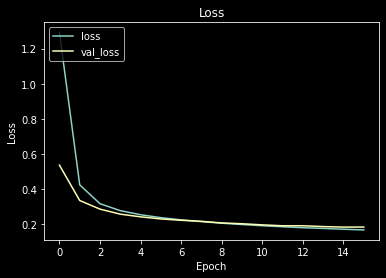

In [8]:
ept.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3/ Quelques examples

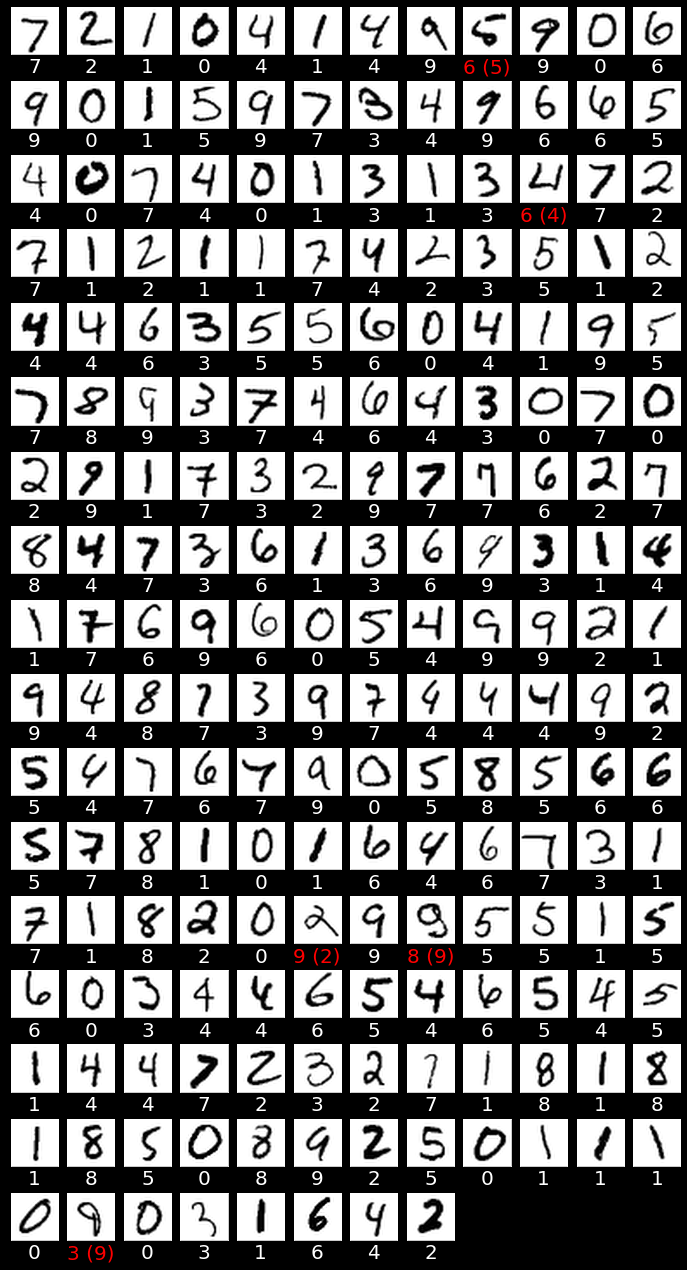

In [9]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

ept.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 7.4/ Quelques erreurs

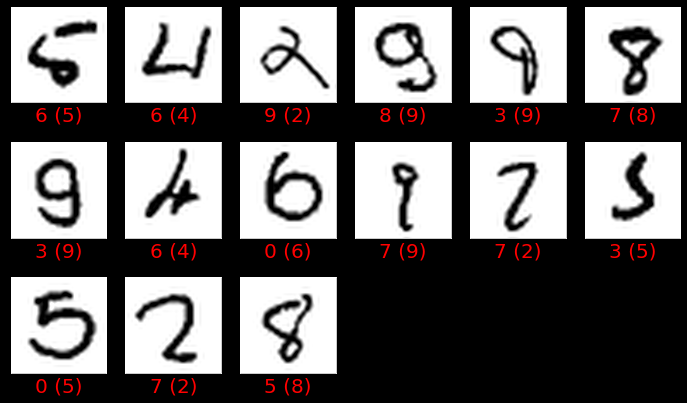

In [10]:
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]
errors = errors[:min(28, len(errors))]
ept.plot_images(x_test, y_test, errors[:15], columns=6,
                x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')


### 7.5/ La matrice de confusion

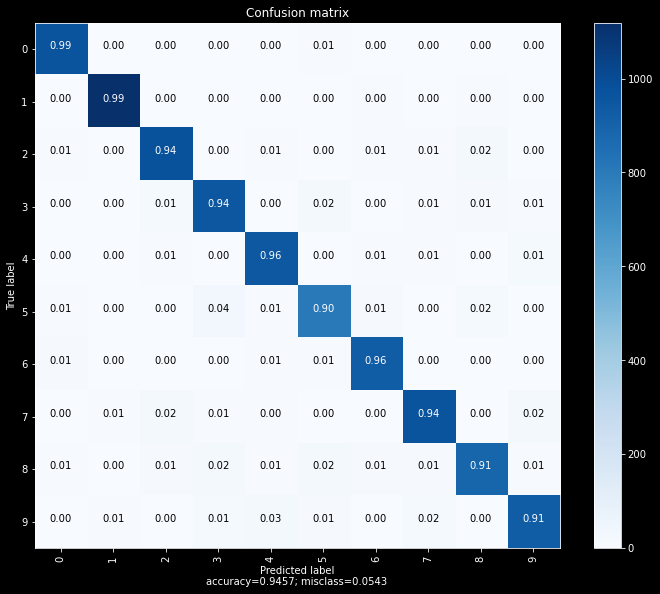

In [11]:
ept.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')